In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to the train directory
train_dir = '/content/drive/MyDrive/melanoma_cancer_dataset/train'

# Data Augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25
)

# Use a larger batch size for better generalization
batch_size = 64

train_data = train_gen.flow_from_directory(
    train_dir,
    subset='training',
    target_size=(224,224),
    batch_size=batch_size,  # Increase batch size
    class_mode='categorical',
    shuffle=True
)

test_data = train_gen.flow_from_directory(
    train_dir,
    subset='validation',
    target_size=(224,224),
    batch_size=batch_size,  # Increase batch size
    class_mode='categorical',
    shuffle=False
)

# Load MobileNetV2 pre-trained model without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom top layers for our task
model = keras.models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=20,  # Increase the number of epochs
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

# Classification report
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(test_data.classes, y_pred))

# Plotting
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 7204 images belonging to 2 classes.
Found 2401 images belonging to 2 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/20
113/113 [==============================] - 2076s 18s/step - loss: 0.3970 - accuracy: 0.8251 - val_loss: 0.2871 - val_accuracy: 0.8809
Epoch 2/20
113/113 [==============================] - 156s 1s/step - loss: 0.3148 - accuracy: 0.8688 - val_loss: 0.2708 - val_accuracy: 0.8892
Epoch 3/20
113/113 [==============================] - 154s 1s/step - loss: 0.2976 - accuracy: 0.8749 - val_loss: 0.2565 - val_accuracy: 0.8980
Epoch 4/20
113/113 [==============================] - 148s 1s/step - loss: 0.2871 - accuracy: 0.8792 - val_loss: 0.2545 - val_accuracy: 0.8959
Epoch 5/20
113/113 [==============================] - 150s 1s/step - loss: 0.2886 - accuracy: 0.8799 - val_loss: 0.2462 - val_accuracy: 0.8946
Epoch 6

KeyboardInterrupt: 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 7204 images belonging to 2 classes.
Found 2401 images belonging to 2 classes.
Epoch 1/20
57/57 [==============================] - 178s 3s/step - loss: 0.7245 - accuracy: 0.6480 - val_loss: 0.6188 - val_accuracy: 0.6506
Epoch 2/20
57/57 [==============================] - 165s 3s/step - loss: 0.5049 - accuracy: 0.7443 - val_loss: 0.6432 - val_accuracy: 0.4810
Epoch 3/20
57/57 [==============================] - 167s 3s/step - loss: 0.4122 - accuracy: 0.8097 - val_loss: 0.5368 - val_accuracy: 0.7955
Epoch 4/20
57/57 [==============================] - 162s 3s/step - loss: 0.3630 - accuracy: 0.8473 - val_loss: 0.5824 - val_accuracy: 0.5319
Epoch 5/20
57/57 [==============================] - 165s 3s/step - loss: 0.3331 - accuracy: 0.8633 - val_loss: 0.5554 - val_accuracy: 0.5981
Epoch 6/20
57/57 [==============================] - 166s 3s/step - loss: 0.3177 - 

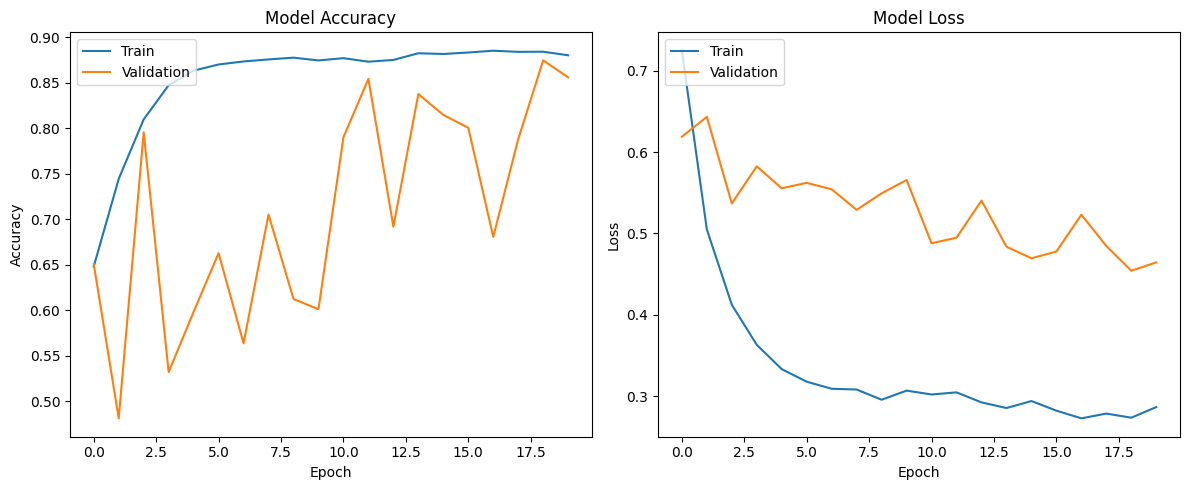

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to the train directory
train_dir = '/content/drive/MyDrive/melanoma_cancer_dataset/train'

# Data Augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25
)

# Use a larger batch size for better generalization
batch_size = 128

train_data = train_gen.flow_from_directory(
    train_dir,
    subset='training',
    target_size=(224,224),
    batch_size=batch_size,  # Increase batch size
    class_mode='categorical',
    shuffle=True
)

test_data = train_gen.flow_from_directory(
    train_dir,
    subset='validation',
    target_size=(224,224),
    batch_size=batch_size,  # Increase batch size
    class_mode='categorical',
    shuffle=False
)

# Define model architecture
model_2 = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    keras.layers.Dropout(0.1),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_2.fit(
    train_data,
    validation_data=test_data,
    epochs=20,  # Increase the number of epochs
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

# Classification report
Y_pred = model_2.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(test_data.classes, y_pred))

# Plotting
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to the train directory
train_dir = '/content/drive/MyDrive/melanoma_cancer_dataset/train'

# Data Augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25
)

# Use a larger batch size for better generalization
batch_size = 64

train_data = train_gen.flow_from_directory(
    train_dir,
    subset='training',
    target_size=(299,299),  # InceptionV3 requires input size (299, 299)
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_data = train_gen.flow_from_directory(
    train_dir,
    subset='validation',
    target_size=(299,299),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load InceptionV3 pre-trained model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom top layers for our task
model = keras.models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=20,  # Increase the number of epochs
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

# Classification report
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(test_data.classes, y_pred))

# Plotting
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Mounted at /content/drive
Found 7204 images belonging to 2 classes.
Found 2401 images belonging to 2 classes.
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/20
113/113 [==============================] - 2235s 19s/step - loss: 0.4599 - accuracy: 0.8004 - val_loss: 0.3104 - val_accuracy: 0.8726
Epoch 2/20
113/113 [==============================] - 245s 2s/step - loss: 0.3288 - accuracy: 0.8626 - val_loss: 0.3061 - val_accuracy: 0.8688
Epoch 3/20
113/113 [==============================] - 242s 2s/step - loss: 0.3108 - accuracy: 0.8734 - val_loss: 0.2833 - val_accuracy: 0.8780
Epoch 4/20
113/113 [==============================] - 267s 2s/step - loss: 0.2973 - accuracy: 0.8797 - val_loss: 0.2779 - val_accuracy: 0.8925
Epoch 5/20
113/113 [==============================] - 242s 2s/step - loss: 0.2976 - accuracy: 0.8777 - val_loss: 0.2623 - val_accuracy: 0.8917
Epoch 6/20
113/113 [==============================] - 244s 2s/step - loss: 0.2827 - accuracy: 0.8853 - val_l

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to the train directory
train_dir = '/content/drive/MyDrive/melanoma_cancer_dataset/train'
input_shape = (224, 224, 3)
num_classes = 2
batch_size = 64
epochs = 30  # Increase the number of epochs

# Data augmentation with more aggressive techniques
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,  # Increased rotation range
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Fine-tune the last few layers of the base model
for layer in base_model.layers[:-5]:
    layer.trainable = False

# Add custom classification head
inputs = keras.Input(shape=input_shape)
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)  # Add BatchNormalization
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Implement learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, verbose=1)
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 7684 images belonging to 2 classes.
Found 1921 images belonging to 2 classes.


NameError: name 'DenseNet121' is not defined

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Label: benign (0)
Label: benign (0)
Label: benign (0)
Label: benign (0)
Label: benign (0)
Label: benign (0)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 133MB/s]


KeyboardInterrupt: 

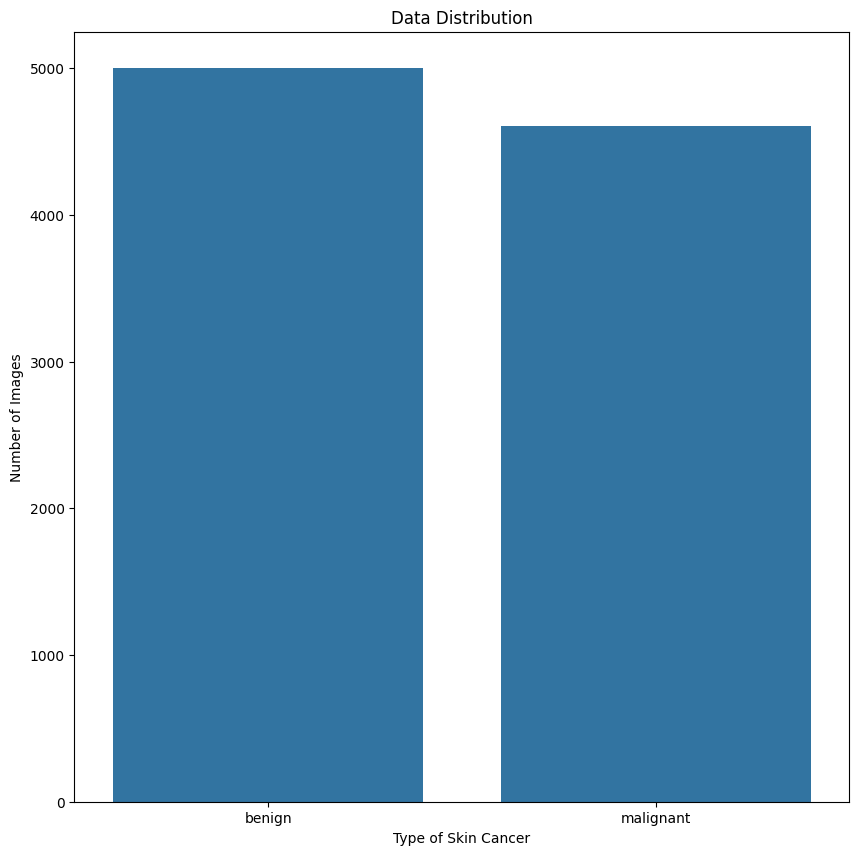

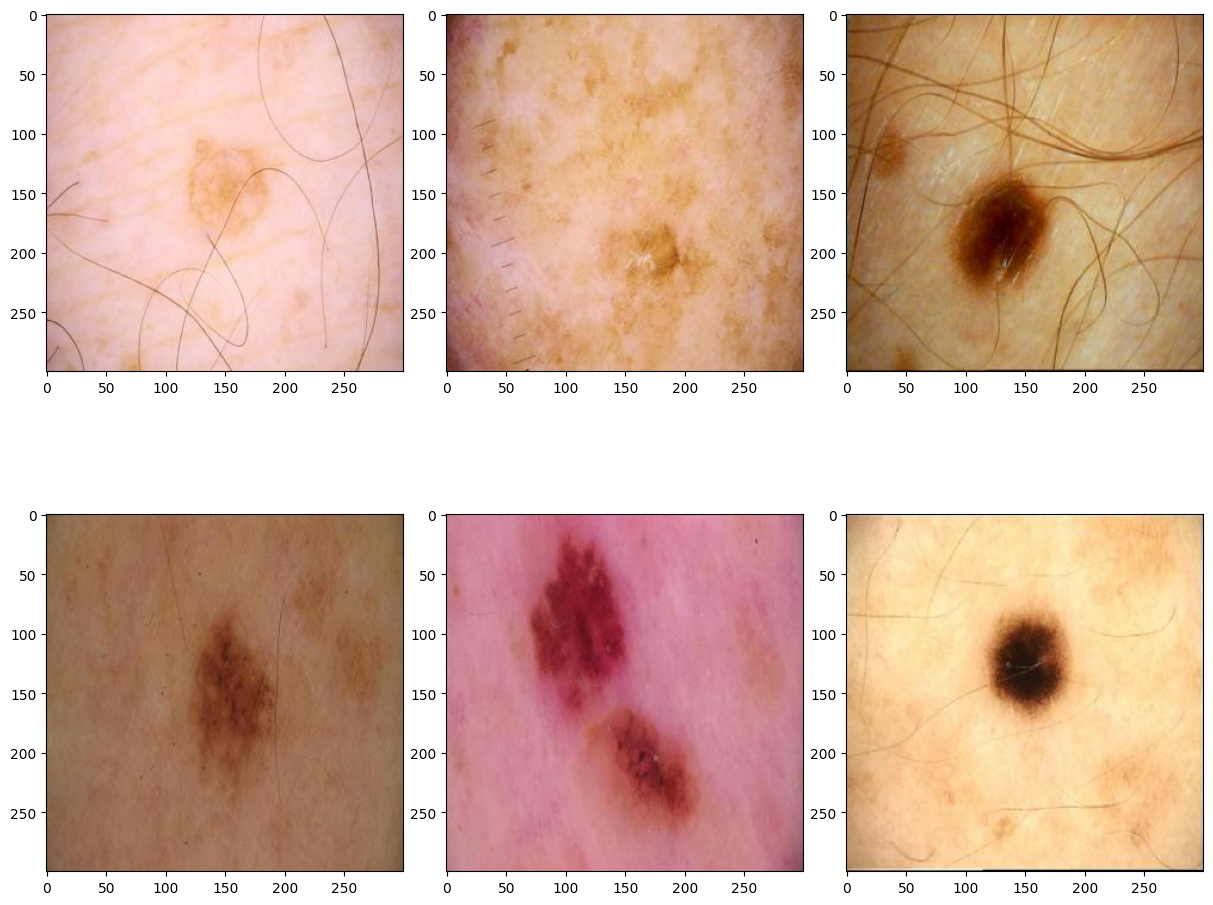

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics import classification_report
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.models import densenet121
from torchvision.utils import make_grid

# Mount Google Drive to access files
drive.mount('/content/drive')

# Specify the paths
train_dir = "/content/drive/MyDrive/melanoma_cancer_dataset/train"

# List the directories in the train folder
skin = os.listdir(train_dir)
nums_train = {}
for s in skin:
    nums_train[s] = len(os.listdir(train_dir + '/' + s))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])

# Visualize data distribution
plt.figure(figsize=(10, 10))
plt.title('Data Distribution')
plt.ylabel('Number of Images')
plt.xlabel('Type of Skin Cancer')
sns.barplot(x=list(nums_train.keys()), y=list(nums_train.values()))

# Function to show image
train = ImageFolder(train_dir, transform=transforms.ToTensor())
def show_image(image, label):
    print("Label: " + train.classes[label] + " (" + str(label) + ")")
    return image.permute(1, 2, 0)

# Display some sample images
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[1]))
axs[0,1].imshow(show_image(*train[260]))
axs[1,0].imshow(show_image(*train[850]))
axs[1,1].imshow(show_image(*train[930]))
axs[0,2].imshow(show_image(*train[1250]))
axs[1,2].imshow(show_image(*train[1380]))

# Data augmentation and normalization
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets
train_data = ImageFolder(train_dir, transform=train_transforms)
test_data = ImageFolder(train_dir, transform=test_transforms)

# Define data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Load pre-trained DenseNet121 model
model = densenet121(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, len(train_data.classes))
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    train_loss = 0.0
    test_loss = 0.0

    # Training
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * images.size(0)

    test_loss = test_loss / len(test_loader.dataset)
    test_losses.append(test_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluation
model.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

print(classification_report(test_labels, test_preds))


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    verbose=1
)

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Generate confusion matrix
conf_matrix = confusion_matrix(validation_generator.classes, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print classification report
print(classification_report(validation_generator.classes, y_pred))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: name 'y_pred' is not defined

In [ ]:
# Cell 1: Define y_pred
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Cell 2: Generate and plot confusion matrix
conf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Cell 3: Print classification report
print(classification_report(validation_generator.classes, y_pred))

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score
from sklearn.metrics import roc_auc_score, average_precision_score, recall_score, precision_score, f1_score

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Path to the dataset
train_dir = "/content/drive/MyDrive/melanoma_cancer_dataset/train"

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

# Load pre-trained DenseNet121 model
base_model = DenseNet121(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(2, activation='softmax')(x)
model = Model(base_model.input, output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()

# Evaluate the model
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(validation_generator.classes, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print classification report
print(classification_report(validation_generator.classes, y_pred))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(validation_generator.classes, Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr[1], tpr[1], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute precision-recall curve and area under the curve
precision, recall, _ = precision_recall_curve(validation_generator.classes, Y_pred[:, 1])
average_precision = average_precision_score(validation_generator.classes, Y_pred[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AUC={0:0.2f}'.format(average_precision))
plt.show()

# Disease detection metrics
sensitivity = recall_score(validation_generator.classes, y_pred)
specificity = accuracy_score(validation_generator.classes, y_pred)
ppv = precision_score(validation_generator.classes, y_pred)
npv = specificity
disease_metrics = {'Sensitivity': sensitivity, 'Specificity': specificity, 'PPV': ppv, 'NPV': npv}

# Plot disease detection metrics
plt.figure(figsize=(8, 6))
plt.bar(disease_metrics.keys(), disease_metrics.values(), color='skyblue')
plt.title('Disease Detection Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

# Predictions vs. Ground Truth using scatter plots
plt.figure(figsize=(8, 6))
plt.scatter(validation_generator.classes, y_pred)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Predictions vs. Ground Truth')
plt.show()

# Model Architecture
tf.keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True)

# Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve: Loss')
plt.legend()
plt.show()

# Feature Importance (Not applicable for image data)

# Interactive Visualizations and Temporal Analysis (Not applicable for this code)

# Geographical Analysis (Not applicable for this code)
